# XGBoost Test

This notebook will contain a sample use of the XGBoost library to determine feasibility in use for the study 

**[Evaluation and Comparison of Boosted ML Models in Behavior-Based Malware Detection]**

## GPU Support

XGBoost supports GPU accelerated computing albeit it (the library) must be built/compiled specifically to run as shown in these links.

- [Build GPU version (OpenCL; Linux/Win)](https://lightgbm.readthedocs.io/en/stable/Installation-Guide.html#build-gpu-version)
- [Build CUDA version (Nvidia GPUs; Linux)](https://lightgbm.readthedocs.io/en/stable/Installation-Guide.html#build-cuda-version)

## Fun Fact
Despite being open-source, it turns out that LightGBM was originally made by Microsoft in comparison's to XGBoost's true open-source origin (i.e., community contributors).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split #For Splitting Datasets
from sklearn import preprocessing #For LabelEncoding
from sklearn.metrics import classification_report #For Classification Report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #For Confusion Matrix
import matplotlib.pyplot as plt #For figure plotting.
from sklearn.model_selection import RandomizedSearchCV #For automated hyperparameter tuning; Would be better if it was GridSearchCV

# 1. Installation

*This test will only use Python version of XGBoost. There are two ways it could be installed which are through Python's pip or Conda (via Anaconda). For this test we'll be using Python via Anaconda instead.*

## 1.1. via Python (used for this demo)

1. Open this link [XGBoost Install for Python](https://xgboost.readthedocs.io/en/stable/install.html#python)
2. Open your Anaconda Terminal
3. Enter `pip install lightgbm` (Note that this is only for CPU XGBoost).

## 1.2. via Others
1. Refer to this [link](https://lightgbm.readthedocs.io/en/stable/Installation-Guide.html) for more information.

# 2. Verifying Library Installation

*As long as it does not show an error upon importing, it means that it works*

In [2]:
#Verifying installation of LightGBM
import lightgbm as lgbm

# 3. Sample Dataset

*For this sample, the [crops dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset) similar in [this notebook](https://github.com/jm55/CSINTSY-MCO-5/blob/main/Machine%20Learning/notebook-v2.2.ipynb) will be ued in this demo.*

In [3]:
crops_df = pd.read_csv('crops_dataset.csv')
crops_df

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Reminder

Note that the dataset is a multi-class dataset which means that the output is not simply 0 or 1 like the case of the official thesis document. Hence, there will be some differences in the real study.

# 4. Implementing LightGBM Classifier

*This demonstrates the use of the SKLearn like implementation/use of LightGBM with the other parameters as well as other related functions and properties is as shown in this [link](https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html)*.

Sample Complete Parameters (not all are included in the example):

`lgbm.LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)`

## 4.1. Loading Classifier

In [4]:
#Loading XGBClassifier as an object
lgbmclassifier = lgbm.LGBMClassifier()

## 4.2. Splitting Datasets to Train and Test Datasets

In [5]:
#Splitting datasets to train and test datasets
features = crops_df.columns.to_list()
features = features[0:len(features)-2]

le = preprocessing.LabelEncoder()
labels = le.fit_transform(crops_df['label']) #Converting t

X,y = crops_df[features],labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 4.3. Loading Hyperparameter Tuning

Refer to [this](https://xgboost.readthedocs.io/en/stable/parameter.html) in relation to [this](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier).

Note that the hyperparameter values shown in the tuning choices here are not complete as some values were ommited due to errors or to improve tuning speed relative to the available hardware. 

Booster `'dart'` may be better performing but at the extreme cost of time as tests suggests that it runs at ~30mins each iteration during RandomizedSearchCV, hence it was removed on this demo.

In [6]:
param = {'boosting_type':['gbdt','rf'], 'num_leaves':[2,10,20,21,31], 'max_depth':[-1], 'learning_rate':[0.001], 
         'n_estimators':[10,100,1000,5000,10000], 'subsample_for_bin':[100000,200000,500000,1000000], 
         'class_weight':[None,'balanced'], 'random_state':[1], 'n_jobs':[-1], 'importance_type':['split','gain']}

tuner = RandomizedSearchCV(lgbmclassifier, param, verbose=2, n_jobs=2, cv=5, refit=True, error_score=0, random_state=1)
tuner.fit(X_train,y_train)
print("Best Score:", tuner.best_score_)
print("Best Params:", tuner.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ejose\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ejose\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ejose\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\ejose\anaconda3\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
    self._Booster = train(
  File "C

Best Score: 0.9607954545454547
Best Params: {'subsample_for_bin': 1000000, 'random_state': 1, 'num_leaves': 21, 'n_jobs': -1, 'n_estimators': 5000, 'max_depth': -1, 'learning_rate': 0.001, 'importance_type': 'gain', 'class_weight': None, 'boosting_type': 'gbdt'}


## 4.4. Loading Tuned Parameters to Model

In [7]:
#Reloading model with better parameters
lgbmclassifier = lgbm.LGBMClassifier(**tuner.best_params_)

#Fitting/Training model
lgbmclassifier.fit(X_train, y_train)

LGBMClassifier(importance_type='gain', learning_rate=0.001, n_estimators=5000,
               num_leaves=21, random_state=1, subsample_for_bin=1000000)

## 4.5. Results

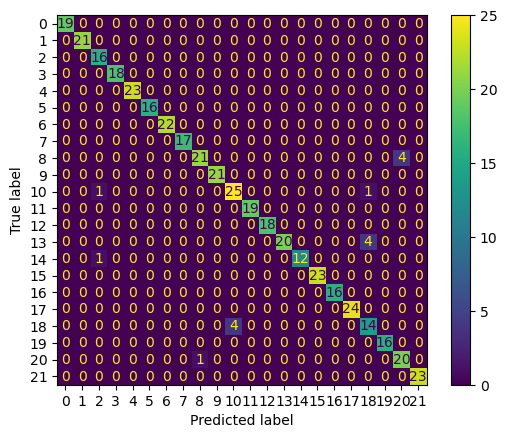

              precision    recall  f1-score   support

       apple     1.0000    1.0000    1.0000        19
      banana     1.0000    1.0000    1.0000        21
   blackgram     0.8889    1.0000    0.9412        16
    chickpea     1.0000    1.0000    1.0000        18
     coconut     1.0000    1.0000    1.0000        23
      coffee     1.0000    1.0000    1.0000        16
      cotton     1.0000    1.0000    1.0000        22
      grapes     1.0000    1.0000    1.0000        17
        jute     0.9545    0.8400    0.8936        25
 kidneybeans     1.0000    1.0000    1.0000        21
      lentil     0.8621    0.9259    0.8929        27
       maize     1.0000    1.0000    1.0000        19
       mango     1.0000    1.0000    1.0000        18
   mothbeans     1.0000    0.8333    0.9091        24
    mungbean     1.0000    0.9231    0.9600        13
   muskmelon     1.0000    1.0000    1.0000        23
      orange     1.0000    1.0000    1.0000        16
      papaya     1.0000    

In [8]:
#Testing Predictions
y_pred = lgbmclassifier.predict(X_test)

#Create confusion matrix
lgbm_cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lgbm_cm)
disp.plot()
plt.show()

#Converting LabelEncoded to String Labels
y_pred_str = le.inverse_transform(y_pred)
y_test_str = le.inverse_transform(y_test)

#Create classification report
lgbm_cr = classification_report(y_test_str, y_pred_str, digits=4)
print(lgbm_cr)

# 5. Further Reading/Documentation/Examples

https://lightgbm.readthedocs.io/en/stable/Python-API.html